<a href="https://colab.research.google.com/github/Beatriz-Yun/AIFFEL_LMS/blob/main/12%EC%9D%BC%EC%B0%A8_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

일반적으로 딥러닝 기술은 **"데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)"**의 순서대로 만들게 된다.

<br>

---

<br>

tensorflow의 표준 API인 tf.keras의 Sequential API를 이용하여 숫자 손글씨 인식기를 만들 것이다.<br>
MNIST데이터셋은 숫자 손글씨 이미지 데이터베이스이다.
이미지의 크기는 28x28이다.<br>
총 7만장의 이미지가 있고, 60000장의 training set과 10000장의 test set으로 구성되어 있다.<br>
train set은 대략 250명의 손글씨가 들어있다.

In [1]:
import tensorflow as tf

print(tf.__version__)    # tensorflow 버전

2.5.0


## 데이터 준비하기

[train/validation/test 데이터셋](https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/)
- 머신러닝 학습 과정이 정상적으로 진행되고 있는지, 오버피팅이 발생하고 있지 않은지, 학습을 중단해도 되는지 등을 확인하고 싶을 때 validation set을 사용한다.

In [2]:
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt   # 데이터 시각화 라이브러리

mnist = keras.datasets.mnist

# # keras에서 MNIST데이터 로드. (다운로드하지 않았다면 다운로드까지 자동으로 진행됨)
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))               # train set의 데이터 개수 (6만개)
print(len(x_test))                # test set의 데이터 개수 (1만개)

print(x_train.shape)              # x_train 배열의 크기 (데이터개수 x 이미지크기(픽셀x픽셀))
print(x_test.shape)               # x_test 배열의 크기 (데이터개수 x 이미지크기(픽셀x픽셀))

11493376/11490434 [==============================] - 0s 0us/step
60000
10000
(60000, 28, 28)
(10000, 28, 28)


[matplotlib 공식문서](https://matplotlib.org/2.0.2/gallery.html) <br>
[matplotlib.cm에서 choosing colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

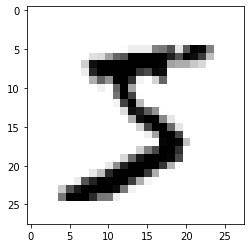

In [3]:
plt.imshow(x_train[0],cmap=plt.cm.binary)    # 첫 번째 이미지. cmap으로 컬러맵 설정. 
plt.show()

In [4]:
print(y_train[0])    # 첫 번째 이미지의 정답레이블

5


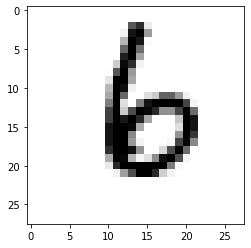

2021 번째 이미지의 숫자는 바로  6 입니다.


In [5]:
# index에 0~59999 지정 가능
index=2020     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

숫자 손글씨 이미지의 픽셀 값은 0\~255사이의 값을 가진다.<br>
인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력을 0~1사이의 값으로 정규화시키는게 좋기 때문에 255.0으로 나누자.

In [6]:
print('최솟값:',np.min(x_train), ' 최댓값:',np.max(x_train))

최솟값: 0  최댓값: 255


In [7]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0             # 데이터 0~1값으로 정규화
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 딥러닝 네트워크 설계하기

tf.keras에서 Sequential API를 사용할 것이다.<br>
Sequential API는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법이다.

<br>

---

<br>

**Conv2D 레이어**의 첫 번째 인자: 사용하는 특징 수 (ex. 16, 32)
- 입력 이미지가 다양하거나 복잡해질 경우, 특징 수를 더 늘려주는 것을 고려해 볼 수있다.

<br>

**Dense 레이어**의 첫 번째 인자: 분류기에 사용되는 뉴런의 수 (ex. 32, 64, 128)
- 이 값이 클수록 복잡한 분류기를 만들 수 있다.
- 가장 마지막 Dense 레이어의 첫 번째 인자는 예측 레이블을 출력해야 하기 때문에 클래스 수로 지정한다.

In [8]:
# Sequential API를 사용하여 LeNet이라는 딥러닝 네트워크를 설계
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [9]:
# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 딥러닝 네트워크 학습시키기

딥러닝 네트워크의 입력은 (데이터개수, 이미지크기x, 이미지크기y, 채널수)의 형태를 가진다.<br>
네트워크를 설계할 때 input_shape=(28, 28, 1)로 지정했듯이 **채널수가 1이면 흑백이미지**를 의미한다. 

In [10]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


epochs=10: 전체 train set 데이터 6만개를 10번 반복 사용해서 학습을 시킨다.

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 2ms/step - loss: 0.1929 - accuracy: 0.9413
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0581 - accuracy: 0.9822
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0411 - accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0333 - accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0223 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0189 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0167 - accuracy: 0.9943
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.01

## 딥러닝 네트워크 성능 확인하기

test set을 사용하여 성능을 확인한다.

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0403 - accuracy: 0.9881
test_loss: 0.040256474167108536 
test_accuracy: 0.988099992275238


In [13]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [3.9797147e-08 6.9254319e-10 7.1476403e-10 3.1223304e-09 2.4323758e-11
 2.5785953e-11 2.5212905e-14 1.0000000e+00 1.2021358e-10 1.2863955e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


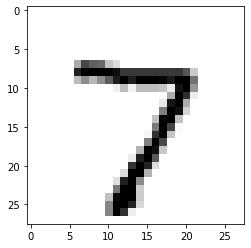

In [14]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [4.1241732e-05 4.7992763e-01 3.9707184e-06 8.4394569e-10 1.3460075e-06
 1.5273455e-06 5.1647890e-01 2.8401402e-08 3.5454154e-03 6.3536092e-09]
라벨: 1, 예측결과: 6


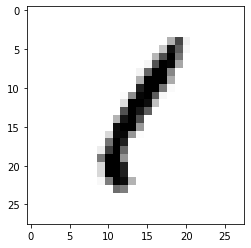

예측확률분포: [5.7809125e-06 1.4983712e-01 3.2743490e-08 4.9950918e-06 2.2878707e-03
 1.6427850e-02 2.3108594e-05 1.4598834e-05 3.0044428e-01 5.3095430e-01]
라벨: 1, 예측결과: 9


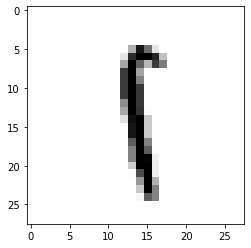

예측확률분포: [2.2705362e-04 8.1665013e-03 7.1387160e-01 2.1047967e-03 2.7991662e-02
 3.0500458e-05 5.0612427e-05 2.5621396e-03 2.4488793e-01 1.0718086e-04]
라벨: 8, 예측결과: 2


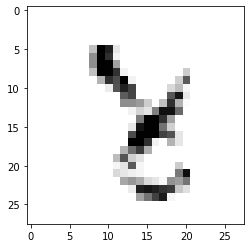

예측확률분포: [1.3329667e-05 9.3592301e-02 1.0933549e-03 1.4271154e-01 8.4582344e-02
 6.5863329e-01 1.9047592e-02 3.5539213e-12 3.2630356e-04 2.5060443e-08]
라벨: 1, 예측결과: 5


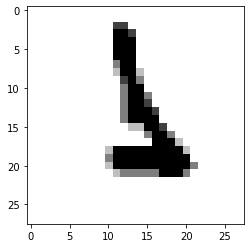

예측확률분포: [6.4163029e-01 4.7806157e-07 2.8252252e-06 1.8151435e-11 2.8322474e-04
 1.2024004e-08 3.5793215e-01 7.6415507e-13 1.5106659e-04 2.9971829e-08]
라벨: 6, 예측결과: 0


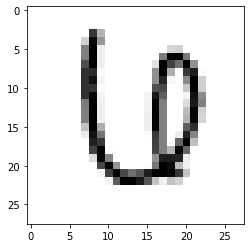

In [15]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 성능 개선하기

딥러닝 네트워크 구조 자체를 바꾸지 않고, 하이퍼파라미터를 바꿔서 다시 학습시켜 보자.

<br><br>

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10
test_loss: 0.030280688777565956 
test_accuracy: 0.9918000102043152

test_loss: 0.04574832692742348 
test_accuracy: 0.9872999787330627

n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=10
test_loss: 0.03657081723213196 
test_accuracy: 0.9908999800682068

n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=10
test_loss: 0.042673829942941666 
test_accuracy: 0.9914000034332275




In [16]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

## 미니 프로젝트: 가위바위보 분류기 만들기

### 0. colab환경에서 학습하기 위한 구글 드라이브에 데이터 준비

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os

print(os.getenv("HOME"))

/root


[!cd로 디렉토리를 이동했을 때 동작하지 않는 문제 해결](https://stackoverflow.com/questions/53854159/accessing-files-on-google-colab)
- %cd로 실행하면 잘 동작하는 것을 확인할 수 있다.

In [23]:
%cd "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/rock"

/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/rock


In [24]:
%ls

rock_all.zip


In [26]:
!unzip rock_all.zip

# 가위 이미지 데이터는 직접 구글 드라이브에 업로드 함.
# %cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor
# !unzip scissor_all.zip

%cd "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/paper"
!unzip paper_all.zip

Archive:  rock_all.zip
  inflating: 0 (10).jpg              
  inflating: 0 (2).jpg               
  inflating: 0 (3).jpg               
  inflating: 0 (4).jpg               
  inflating: 0 (5).jpg               
  inflating: 0 (6).jpg               
  inflating: 0 (7).jpg               
  inflating: 0 (8).jpg               
  inflating: 0 (9).jpg               
  inflating: 0.jpg                   
  inflating: 1 (10).jpg              
  inflating: 1 (2).jpg               
  inflating: 1 (3).jpg               
  inflating: 1 (4).jpg               
  inflating: 1 (5).jpg               
  inflating: 1 (6).jpg               
  inflating: 1 (7).jpg               
  inflating: 1 (8).jpg               
  inflating: 1 (9).jpg               
  inflating: 1.jpg                   
  inflating: 10 (10).jpg             
  inflating: 10 (2).jpg              
  inflating: 10 (3).jpg              
  inflating: 10 (4).jpg              
  inflating: 10 (5).jpg              
  inflating: 10 (6).jpg    

### 1. 데이터 불러오기 + Resize 하기

In [33]:
from PIL import Image
import os, glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

  # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위, 바위, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
path_base = "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"

image_dir_path = path_base + "scissor"
print(image_dir_path)
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = path_base + "rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = path_base + "paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor
1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


In [39]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 총 개수
    # 레이블) 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    # 이미지 데이터와 레이블 데이터를 담을 행렬(matrix) 영역을 생성한다.
    # number_of_data와 img_size*img_size와 color(채널수)를 모두 곱한 크기의 0행렬이 생성된다.
    # 이 행렬을 우리가 원하는 크기인 (데이터수, 이미지크기x, 이미지크기y, 채널수)로 reshape해주는 과정이다.
    imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data,dtype=np.int32)

    # 가위, 바위, 보 순으로 이미지데이터를 imgs행렬에 저장한다.
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)    # 이미지파일을 ndarray로 저장
        imgs[idx,:,:,:]=img                                # 데이터 영역에 가위 이미지 행렬을 복사
        labels[idx]=0                                      # 가위의 레이블 0을 저장
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 바위 이미지 행렬을 복사
        labels[idx]=1                                      # 바위의 레이블 1을 저장
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 보 이미지 행렬을 복사
        labels[idx]=2                                      # 보의 레이블 2를 저장
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# resize 처리 후, 저장된 이미지 다시 불어오기
# path_base는 "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"
# 이미지 행렬과 레이블 행렬이 각각 x, y에 저장된다.
(x, y)=load_data(path_base)

# 입력 이미지 데이터를  0~1 사이의 값으로 정규화
x_norm = x/255.0

x_train, x_test, y_train, y_test = train_test_split(x_norm, y, random_state=66, test_size=0.3)
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (2100, 28, 28, 3)
y_train shape: (2100,)
x_test shape: (900, 28, 28, 3)
y_test shape: (900,)


전처리 된 tran set 이미지 출력해보기

라벨:  0


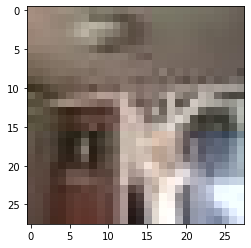

In [40]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 2. 딥러닝 네트워크 설계하기

In [41]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 하이퍼파라미터
n_channel_1=32
n_channel_2=64
n_dense=64

# model 구성
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (No

### 3. 딥러닝 네트워크 학습시키기

In [42]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

print(x_train.shape)
print(x_test.shape)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

n_train_epoch=20
# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

(2100, 28, 28, 3)
(900, 28, 28, 3)
Epoch 1/20
66/66 [==============================] - 32s 4ms/step - loss: 1.0984 - accuracy: 0.3657
Epoch 2/20
66/66 [==============================] - 0s 3ms/step - loss: 0.9658 - accuracy: 0.5200
Epoch 3/20
66/66 [==============================] - 0s 3ms/step - loss: 0.7897 - accuracy: 0.6152
Epoch 4/20
66/66 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.7319
Epoch 5/20
66/66 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.7905
Epoch 6/20
66/66 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8467
Epoch 7/20
66/66 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8876
Epoch 8/20
66/66 [==============================] - 0s 3ms/step - loss: 0.2724 - accuracy: 0.9105
Epoch 9/20
66/66 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 0.9333
Epoch 10/20
66/66 [==============================] - 0s 3ms/step - loss: 0.1738 - 

### [아예 새로운 데이터로 test set 구성후, 다시 테스트 해보기]
- train set은 총 10명이 찍은 데이터로, test set은 총 3명이 찍은 데이터로 구성해보았다.
- 위에서 unzip하는 과정을 새롭게 만든 test set으로 다시 해준다.

In [50]:
# %cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/rock_test
# !ls
# !unzip rock_all_test.zip

%cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor_test
!unzip scissor_all_test.zip

# %cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/paper_test
# !unzip paper_all_test.zip

/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor_test
Archive:  scissor_all_test.zip
  inflating: 0 (2).jpg               
  inflating: 0 (3).jpg               
  inflating: 0.jpg                   
  inflating: 1 (2).jpg               
  inflating: 1 (3).jpg               
  inflating: 1.jpg                   
  inflating: 10 (2).jpg              
  inflating: 10 (3).jpg              
  inflating: 10.jpg                  
  inflating: 11 (2).jpg              
  inflating: 11 (3).jpg              
  inflating: 11.jpg                  
  inflating: 12 (2).jpg              
  inflating: 12 (3).jpg              
  inflating: 12.jpg                  
  inflating: 13 (2).jpg              
  inflating: 13 (3).jpg              
  inflating: 13.jpg                  
  inflating: 14 (2).jpg              
  inflating: 14 (3).jpg              
  inflating: 14.jpg                  
  inflating: 15 (2).jpg              
  inflating: 15 (3).jpg              
  inflating: 15.jpg        

In [51]:
from PIL import Image
import os, glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

  # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위, 바위, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
path_base = "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"

image_dir_path = path_base + "scissor_test"
print(image_dir_path)
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = path_base + "rock_test"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = path_base + "paper_test"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor_test
300  images to be resized.
300  images resized.
가위 이미지 resize 완료!
300  images to be resized.
300  images resized.
바위 이미지 resize 완료!
300  images to be resized.
300  images resized.
보 이미지 resize 완료!


In [58]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 총 개수
    # 레이블) 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    # 이미지 데이터와 레이블 데이터를 담을 행렬(matrix) 영역을 생성한다.
    imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data,dtype=np.int32)

    # 가위, 바위, 보 순으로 이미지데이터를 imgs행렬에 저장한다.
    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)    # 이미지파일을 ndarray로 저장
        imgs[idx,:,:,:]=img                                # 데이터 영역에 가위 이미지 행렬을 복사
        labels[idx]=0                                      # 가위의 레이블 0을 저장
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 바위 이미지 행렬을 복사
        labels[idx]=1                                      # 바위의 레이블 1을 저장
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 보 이미지 행렬을 복사
        labels[idx]=2                                      # 보의 레이블 2를 저장
        idx=idx+1
        
    print("test set 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# resize 처리 후, 저장된 이미지 다시 불어오기
# path_base는 "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"
# 이미지 행렬과 레이블 행렬이 각각 x, y에 저장된다.
(x_test, y_test)=load_data(path_base)

# 입력 이미지 데이터를  0~1 사이의 값으로 정규화
x_test = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

test set 데이터(x_test)의 이미지 개수는 900 입니다.
x_test shape: (900, 28, 28, 3)
y_test shape: (900,)


In [59]:
# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

29/29 - 0s - loss: 3.3764 - accuracy: 0.4311
test_loss: 3.3764359951019287 
test_accuracy: 0.43111109733581543
